<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 3</h2>

<b> Due on: March 17th, 2024 at 23:59 ADT</b>
<b> Can be completed in groups of 2 or 3</b>

<small>(One submission per group, and you must list all group members at the top of that submission)</small>
</center>

[Assignment Submission Instructions](https://docs.google.com/document/d/1iHzvkaZzNyZJ54Qw4eXJYOC2vzQUPliMyEBbZVRiS4Q/edit?usp=sharing)

### Group Members:

1.Tianzheng Hou(B00889272)
2.Leon Vermaak(B00894772)
3.Shuqiang Zhang(B00908762)

# 1. Convolutional Neural Networks [5 points]

This question builds on A2 Q2.

Use the CIFAR-100 dataset (available from Keras) to train and assess the convolutional neural network provided below.

In [8]:
class CNNBuilder:
    def build_cnn(self, input_shape, num_classes):
        model = Sequential(name="cnn")
        model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
        model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
        model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(num_classes, activation='softmax'))

        return model

you will have to provide the arguments. Feel free to strip the model code out of the function if you want.

## a) Loss & Accuracy vs. Num. Epochs [2 points]
Generate a plot that shows loss & accuracy for training and test sets as a function of the number of epochs. Indicate what a reasonable number of epochs should be.

> MARKER NOTE: 1 points for good training code, 1 points for proper plot.

In [2]:
from keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
X_train, X_test = x_train_original.astype('float32') / 255.0, x_test_original.astype('float32') / 255.0

In [3]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# Model configuration
batch_size = 50
loss_fn = sparse_categorical_crossentropy
optimizer = Adam()
validation_split = 0.2

num_classes = len(set(y_train_original.flatten()))# you find this
input_shape = x_train_original.shape[1:]# you find this
num_epochs = 20# you set this

use your model's built-in `compile()` and `fit()` methods

In [9]:
# your code here

# Convert labels to one-hot encoding

cnn_builder = CNNBuilder()

model = cnn_builder.build_cnn(input_shape, num_classes)

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(X_train, y_train_original,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_split=validation_split)



Epoch 1/20


800/800 [==============================] - 28s 34ms/step - loss: 4.0641 - accuracy: 0.0786 - val_loss: 3.4854 - val_accuracy: 0.1723
Epoch 2/20
800/800 [==============================] - 26s 33ms/step - loss: 3.3263 - accuracy: 0.1981 - val_loss: 2.9643 - val_accuracy: 0.2747
Epoch 3/20
800/800 [==============================] - 27s 34ms/step - loss: 2.9394 - accuracy: 0.2715 - val_loss: 2.7093 - val_accuracy: 0.3282
Epoch 4/20
800/800 [==============================] - 27s 34ms/step - loss: 2.6900 - accuracy: 0.3189 - val_loss: 2.6386 - val_accuracy: 0.3406
Epoch 5/20
800/800 [==============================] - 26s 33ms/step - loss: 2.5047 - accuracy: 0.3566 - val_loss: 2.4970 - val_accuracy: 0.3688
Epoch 6/20
800/800 [==============================] - 27s 33ms/step - loss: 2.3543 - accuracy: 0.3889 - val_loss: 2.4197 - val_accuracy: 0.3841
Epoch 7/20
800/800 [==============================] - 26s 33ms/step - loss: 2.2424 - accuracy: 0.4103 - val_loss: 2.4048 - val_accur

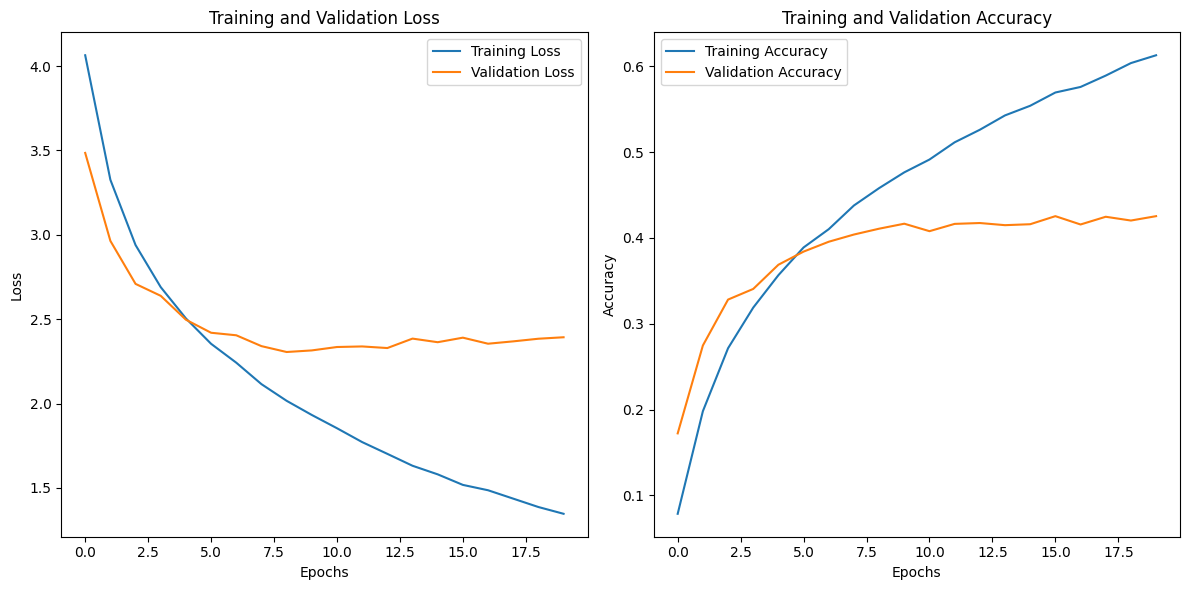

In [10]:
import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## b) Loss & Accuracy vs Train Set Size [2 points]

Generate a plot that shows loss and accuracy for training and test sets as a function of the number of instances in the training set. For this part, you will be modifying your training set. For instance, you can run 10 experiments where you first use a random 10% of the training data, a second experiment where you use a random 20% of the training data, and so on until you use the entire training set. Keep the network hyperparameters constant during your experiments.

Finished:  0.1
Finished:  0.2
Finished:  0.30000000000000004
Finished:  0.4
Finished:  0.5
Finished:  0.6
Finished:  0.7000000000000001
Finished:  0.8
Finished:  0.9
Finished:  1.0


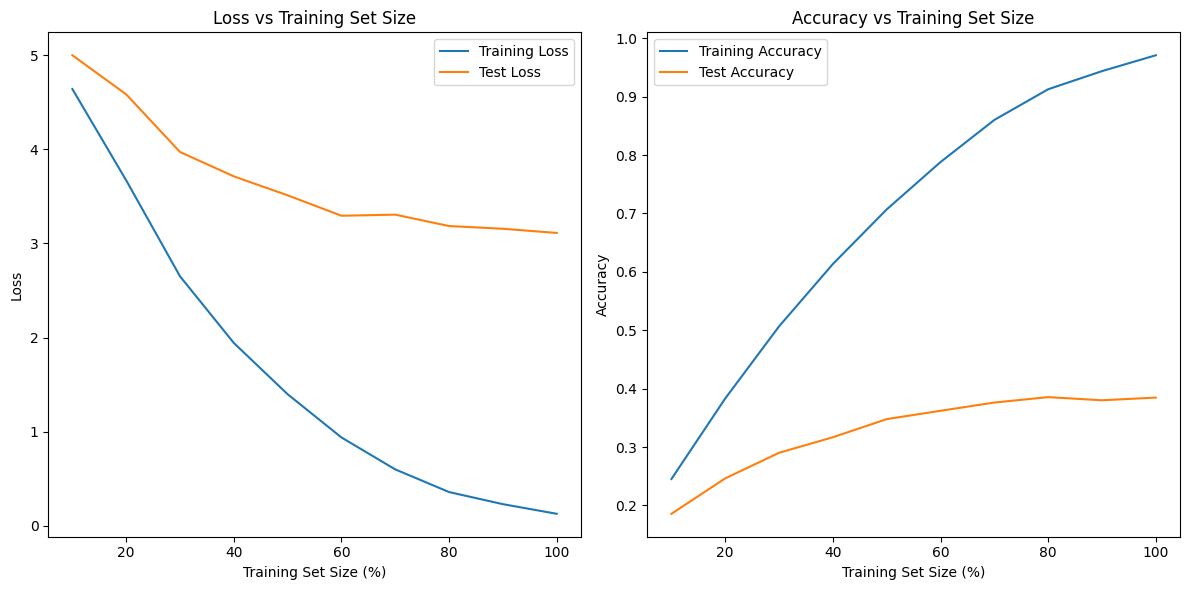

In [ ]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
train_loss_results = []
train_accuracy_results = []
test_loss_results = []
test_accuracy_results = []

training_set_sizes = np.arange(0.1, 1.1, 0.1)

# build the model
cnn_builder = CNNBuilder()
model = cnn_builder.build_cnn(input_shape, num_classes)

for training_fraction in training_set_sizes:
    # Determine the number of instances to use based on the fraction
    num_instances = int(len(X_train) * training_fraction)

    # Randomly select a subset of the training data
    indices = np.random.choice(np.arange(len(X_train)), size=num_instances, replace=False)
    X_train_subset = X_train[indices]
    y_train_subset = y_train_original[indices]

    # Compile the model (if you want to reset the model for each experiment)
    model.compile(optimizer=optimizer,
                  loss=loss_fn,
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_subset, y_train_subset,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        validation_split=validation_split,
                        verbose=0)  # Set verbose to 0 to suppress output

    # Evaluate the model on the full training set
    train_loss, train_accuracy = model.evaluate(X_train, y_train_original, verbose=0)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test_original, verbose=0)

    # Append results to lists
    train_loss_results.append(train_loss)
    train_accuracy_results.append(train_accuracy)
    test_loss_results.append(test_loss)
    test_accuracy_results.append(test_accuracy)

    print("Finished: ", training_fraction)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_set_sizes * 100, train_loss_results, label='Training Loss')
plt.plot(training_set_sizes * 100, test_loss_results, label='Test Loss')
plt.title('Loss vs Training Set Size')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(training_set_sizes * 100, train_accuracy_results, label='Training Accuracy')
plt.plot(training_set_sizes * 100, test_accuracy_results, label='Test Accuracy')
plt.title('Accuracy vs Training Set Size')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## c) Analysis [1 point]
 The beginning, in the lower range, they both see a substantial improvement. However, as we utilize a bigger training set, the difference becomes less pronounced, and the test set begins to improve substantially less than the training set. This means that there is a point where the extra improvement might not be worth the extra training time.

Another thing that needs to be checked is whether the training set is large enough and if we are using the correct model to train on. Even though our training accuracy is above 0.9, the test accuracy doesn't go past 0.4 and levels off.


# 2. Multi-layer Perceptrons [6 points]

## a) Implementation [3 points]

Implement a feedforward neural network by hand using only Python and **basic NumPy functions** for the task of binary classification. The network should have a two-dimensional input, one hidden layer, and use a nonlinear activation function. Mean Squared Error should be used as the cost function and all weights should be randomly initialized.

Your activation function and its derivative should be hardcoded and included below, e.g.:


``` python
def activation(x):
    return x^2

def activation_derivative(x):
    return 2*x
```

feel free to use lambda functions instead if you want.

In [10]:
import numpy as np

class mlp():
    def __init__(self, lr, num_in, num_hidden, num_out):
        self.lr = lr
        self.num_hidden = num_hidden
        self.weights_in = np.random.random_sample((num_in, self.num_hidden))
        self.weights_out = np.random.random_sample((self.num_hidden, num_out))


    def activation(self, x):
        # Clip x to avoid overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))


    def act_der(self, x):
        # Clip x to avoid overflow
        x = np.clip(x, -500, 500)
        return x * (1 - x)  # Derivative of the sigmoid function


    def train(self, X, t):
        # you code the forward pass
        # i've used Roger Grosse's notation here
        z = np.dot(X, self.weights_in) # inputs dotted with input weights
        h = self.activation(z) # input to hidden layers (use activation function)
        y = np.dot(h, self.weights_out) # hidden layer output dotted with output weights
        predictions = self.activation(y) # prediction (be careful re. activation function usage, may want to code a softmax too)

        # error
        cost = predictions - t
        error = np.mean(cost ** 2) # you calculate error using MSE

        # backprop output layer gradients
        delta_out = self.act_der(y)
        dcost_dout = cost * delta_out
        dcost_weights_out = np.dot(h.T, dcost_dout)

        # backprop hidden layer gradients
        dcost_dah = np.dot(dcost_dout, self.weights_out.T)
        din_dhidden = self.act_der(z)
        dcost_weights_hidden = np.dot(X.T, din_dhidden * dcost_dah)

        # you update weights (this is where you use the learning rate)
        self.weights_in -= self.lr * dcost_weights_hidden #
        self.weights_out -= self.lr * dcost_weights_out #

        return error


    def predict(self, X):
        hidden_in = np.dot(X, self.weights_in)
        hidden_act = self.activation(hidden_in)
        out_in = np.dot(hidden_act, self.weights_out)

        return self.activation(out_in)

## b) Training [1 point]
Train the model on the dataset below. Plot your error and your model's predictions.

> Note: Training this model may take far more epochs than previous models you may have worked with. On the order of hundreds of thousands.

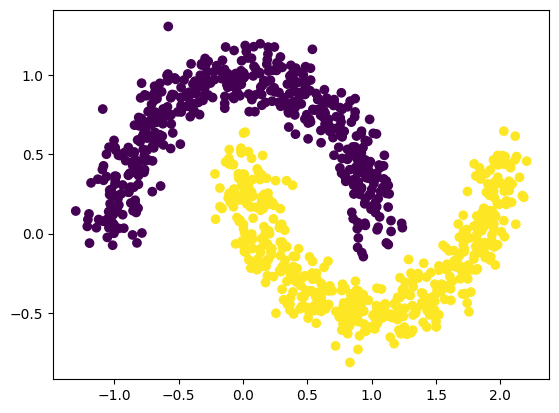

In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt

# generate data
features, labels = datasets.make_moons(1000, noise=0.1, random_state=1)
labels = labels.reshape(1000, 1)

# plot dataset
plt.figure()
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True)

# create and train your model here
network = mlp(lr=0.1, num_in=2, num_hidden=6, num_out=2)

epochs = 100000
for epoch in range(epochs):
    error = network.train(X_train, y_train)
    if epoch % 10000 == 0:
        print(f"Epoch {epoch}: error = {error}")


Epoch 0: error = 0.39883966508440943
Epoch 10000: error = 0.1834375
Epoch 20000: error = 0.1834375
Epoch 30000: error = 0.1834375
Epoch 40000: error = 0.1834375
Epoch 50000: error = 0.1825
Epoch 60000: error = 0.1834375
Epoch 70000: error = 0.1834375
Epoch 80000: error = 0.1834375
Epoch 90000: error = 0.1834375


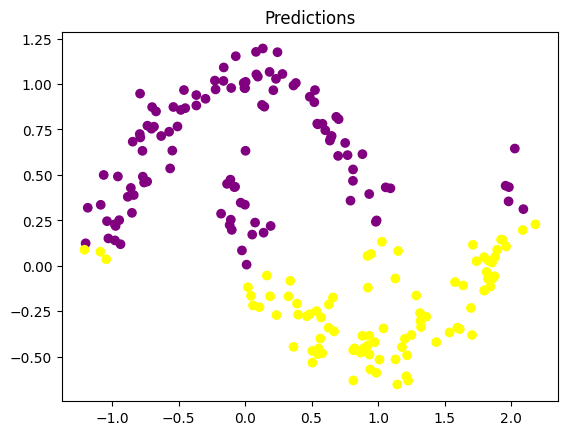

In [15]:
predictions = ["purple" if i[0] < 1 else "yellow" for i in network.predict(X_test)]

# plot your predictions on the test set here
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions)
plt.title('Predictions')
plt.show()

### OPTIONAL / FOR FUN

With a classification task like this it can be helpful to visualize the decision boundaries that your model learns. I found [this stackoverflow post](https://stackoverflow.com/questions/32921268/multilayer-perceptron-visualizing-decision-boundaries-2d-in-python) detailing how to plot the decision boundary of your model, and adapted it so that it *should* work with your model, though you may need to tweak the model name (`network`) if you've used something different.

In [ ]:
h = .02  # step size in the mesh
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = network.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.show()

## c) Findings [2 points]
 Report on your findings, such as what values did you end up using for your hyperparameters, why did you choose those values, what was the final accuracy of your model, and anything else you think might be of interest.

As was suggested, we used 100000 epochs. We don't think this was necessary, as after the first 10000, we didn't see any improvement. Not that it mattered as the training time was short, but with a longer training time, fewer epochs would definitely be recommended.

We did experiment with different learning rates but it didn't produce any better results. We picked this really low rate, because of the number of epochs. This allowed us to get a better understanding of how the network was training. But realistically, a learning rate of 0.1 would be fine.

As recommended, we stayed with one hidden layer, and we found that the optimal number of hidden nodes was six. We believe that with more hidden layers, the accuracy would greatly improve. The network seems to classify the data in a nearly straight line, and we think that with more hidden layers the network would be able to pick out more of the complexities in the spiral structure of the data.

Discussion Here: